In [0]:
import os
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#Loading MovieLens dataset

os.chdir('/content/gdrive/My Drive/ml-latest-small')

import pandas as pd

movies_csv = pd.read_csv('movies.csv')
ratings_csv = pd.read_csv('ratings.csv')
links_csv = pd.read_csv('links.csv')
tags_csv = pd.read_csv('tags.csv')



# Question 1

In [0]:
import numpy as np
movie_count=movies_csv.movieId.shape[0]
user_count = ratings_csv['userId'][ratings_csv['userId'].size-1]
ratings_count=ratings_csv.rating.shape[0]
sparsity=ratings_count/(user_count*movie_count)
#average_rating=np.zeros(193609)
count_rate=np.zeros(movie_count)
movie_dic={}

print('Sparsity: ', sparsity)



Sparsity:  0.016968273253211548


# Question 2

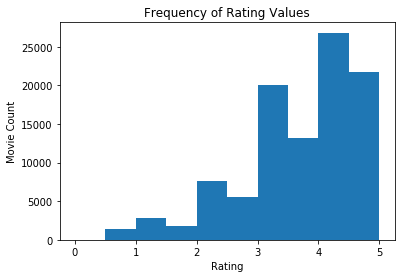

In [0]:
import matplotlib.pyplot as plt

plt.hist(ratings_csv.rating.values, bins=np.linspace(0,5,11)) 
plt.title("Frequency of Rating Values") 
plt.ylabel('Movie Count')
plt.xlabel('Rating')
plt.show()

# Question 3

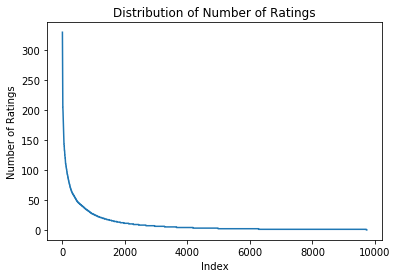

In [0]:
import matplotlib.pyplot as plt
import operator
for i in range (movie_count):
  movie_dic[str(movies_csv.movieId[i])]=np.zeros(1)
for i in range (ratings_count):
  movie_dic[str(ratings_csv.movieId[i])][0]+=1
sort_arr=sorted(movie_dic)
temp_count=np.zeros(movie_count)
for i in range (movie_count):
  temp_count[i]=movie_dic[str(sort_arr[i])][0]
plt.plot(np.flip(np.sort(temp_count)))
plt.title('Distribution of Number of Ratings')
plt.xlabel('Index')
plt.ylabel('Number of Ratings')
plt.show()
a=list(movie_dic.values())
temp_count2=np.asarray(a).flatten()

small_rating=temp_count2<=2
small_rating_id=ratings_csv.movieId.values
small_r_movieId=movies_csv.movieId[small_rating]

# Question 4

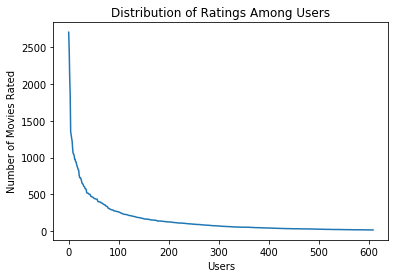

In [0]:

plt.plot(np.flip(np.sort(np.histogram(ratings_csv.userId.values,bins=np.linspace(1,user_count,user_count+1))[0])))
plt.title('Distribution of Ratings Among Users')
plt.xlabel('Users')
plt.ylabel('Number of Movies Rated')
plt.show()


# Question 5

The number of ratings for a movies increases exponentially. Meaning, the number of people interested in popular movies to less popular movies follows an exponential decay

# Question 6

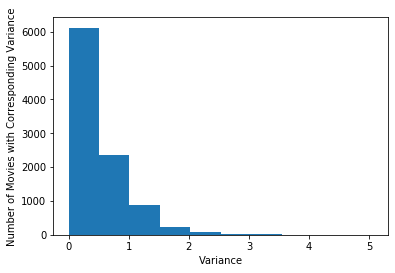

In [0]:
movie_var = np.zeros(movie_count)
for i in range (movie_count):
  temp_ratings = ratings_csv.rating.values[ratings_csv.movieId.values == movies_csv.movieId.values[i]]
  if temp_ratings.any():
    movie_var[i] = temp_ratings.var()
plt.hist(movie_var, bins=np.linspace(0,movie_var.max(),11)) 
plt.xlabel('Variance')
plt.ylabel('Number of Movies with Corresponding Variance')
plt.show()
small_rating_=temp_count2>=5
small_rating_id=ratings_csv.movieId.values
small_r_movieId=movies_csv.movieId[small_rating]
var_rating=movie_var>=2
var_trim = np.logical_or(var_rating, small_rating)
#var_trim=var_rating&small_rating
var_trim_movieId=movies_csv.movieId[var_trim]



# Question 7

# Question 8

# Question 9

# Question 10

In [0]:
#ratings_csv.rating.values[(ratings_csv.userId.values == movies_csv.movieId.values[0])]
#R=np.zeros((user_count,movie_count))
#R[0,ratings_csv.movieId[(ratings_csv.userId.values == movies_csv.movieId.values[0])]-1]=ratings_csv.rating.values[(ratings_csv.userId.values == movies_csv.movieId.values[0])]
#R[1,ratings_csv.movieId[(ratings_csv.userId.values == movies_csv.movieId.values[1])]-1]=ratings_csv.rating.values[(ratings_csv.userId.values == movies_csv.movieId.values[1])]

#print((ratings_csv.rating.values[(ratings_csv.userId.values == movies_csv.movieId.values[1])]).shape)
#ratings_csv.movieId[(ratings_csv.userId.values == movies_csv.movieId.values[1])]-1

In [0]:
!pip install scikit-surprise
import pandas as pd
from surprise import Reader
from surprise import Dataset
from surprise.prediction_algorithms.knns import KNNWithMeans
from surprise.model_selection import cross_validate
from surprise.similarities import pearson
from surprise import Dataset

#data = Dataset.load_builtin('ml-100k')

algo = KNNWithMeans()
algo.sim_options = 'pearson'
#cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

     |████████████████████████████████| 6.5MB 2.8MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.0-cp36-cp36m-linux_x86_64.whl size=1678227 sha256=a81e8ba857eb4c48455005967d362284cf418470cefb7b6c57dfab7e95359992
  Stored in directory: /root/.cache/pip/wheels/cc/fa/8c/16c93fccce688ae1bde7d979ff102f7bee980d9cfeb8641bcf
Successfully built scikit-surprise


In [0]:
import pandas as pd

userId_values=ratings_csv.userId.values
movieId_values=ratings_csv.movieId.values
rating_values=ratings_csv.rating.values
ratings_dic={'movieId': movieId_values,
             'userId': userId_values,
             'rating': rating_values
             }
df=pd.DataFrame(ratings_dic)
reader=Reader(rating_scale=(0,5))
data=Dataset.load_from_df(df[['userId','movieId','rating']],reader)
sim_options = {'name': 'pearson'}
mean_rmse = []
mean_mae = []
for i in range(50): 
  algo = KNNWithMeans(k=2*(i+1), sim_options=sim_options, verbose=False)
  results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=10, verbose=False)
  mean_rmse.append(results['test_rmse'].mean())
  mean_mae.append(results['test_mae'].mean())
  print('Current k: ', 2*(i+1))
  print('mean_rmse: ', mean_rmse[i])
  print('mean_mae: ', mean_mae[i])

Current k:  2
mean_rmse:  1.0190831288915245
mean_mae:  0.7870612677495826
Current k:  4
mean_rmse:  0.9453303559823836
mean_mae:  0.7257126781369453
Current k:  6
mean_rmse:  0.9181648068822282
mean_mae:  0.703493068087233
Current k:  8
mean_rmse:  0.9083264791768286
mean_mae:  0.6950054312985297
Current k:  10
mean_rmse:  0.9018821056990325
mean_mae:  0.6882069123584685
Current k:  12
mean_rmse:  0.8988665021279972
mean_mae:  0.6858936289739115
Current k:  14
mean_rmse:  0.8946892253140813
mean_mae:  0.6823817903187848
Current k:  16
mean_rmse:  0.893321162346689
mean_mae:  0.6802235730412722
Current k:  18
mean_rmse:  0.8934171888840898
mean_mae:  0.6806188107584987
Current k:  20
mean_rmse:  0.8923743686521906
mean_mae:  0.6798840170917463
Current k:  22
mean_rmse:  0.8908526256133028
mean_mae:  0.6782762875752777
Current k:  24
mean_rmse:  0.8907116663321585
mean_mae:  0.6790172499220556
Current k:  26
mean_rmse:  0.8901615700763582
mean_mae:  0.6782474222977717
Current k:  28
mea

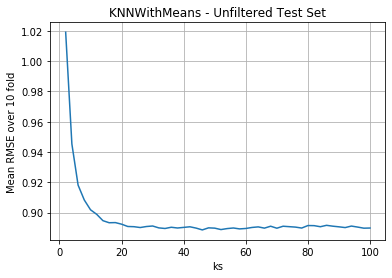

In [0]:
ks = np.linspace(2,100,50, dtype='int16') 
plt.plot(ks, mean_rmse)
plt.xlabel('ks')
plt.ylabel('Mean RMSE over 10 fold')
plt.title('KNNWithMeans - Unfiltered Test Set')
plt.grid()

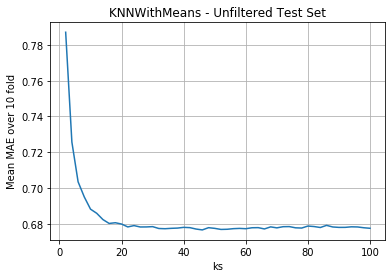

In [0]:
plt.plot(ks, mean_mae)
plt.xlabel('ks')
plt.ylabel('Mean MAE over 10 fold')
plt.title('KNNWithMeans - Unfiltered Test Set')
plt.grid()

In [0]:
print('Lowest Mean RMSE: ', min(mean_rmse))

print('Lowest Mean MAE: ', min(mean_mae))

Lowest Mean RMSE:  0.8885867139018695
Lowest Mean MAE:  0.6766058741645726


# Question 11

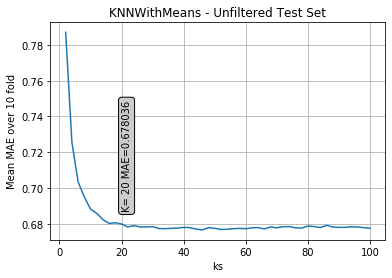

In [0]:
bbox = dict(boxstyle="round", fc="0.8")
plt.plot(ks, mean_mae)
plt.annotate(s='K= '+str(20) +' MAE='+ str(np.round(mean_mae[19],6)),xy=(20,mean_mae[19]+0.01),bbox=bbox,rotation=90)
plt.xlabel('ks')
plt.ylabel('Mean MAE over 10 fold')
plt.title('KNNWithMeans - Unfiltered Test Set')
plt.grid()

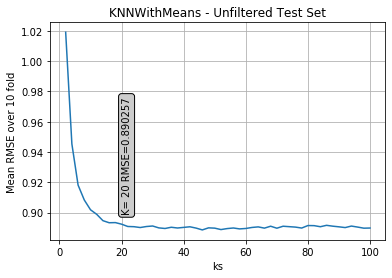

In [0]:
ks = np.linspace(2,100,50, dtype='int16') 
plt.plot(ks, mean_rmse)
plt.annotate(s='K= '+str(20) +' RMSE='+ str(np.round(mean_rmse[19],6)),xy=(20,mean_rmse[19]+0.01),bbox=bbox,rotation=90)
plt.xlabel('ks')
plt.ylabel('Mean RMSE over 10 fold')
plt.title('KNNWithMeans - Unfiltered Test Set')
plt.grid()

k is found by inspection. k=20

# Question 12

In [0]:
#!pip install scikit-surprise
from surprise.model_selection import KFold
import pandas as pd
from surprise import accuracy
from surprise import Reader
from surprise import Dataset
from surprise.prediction_algorithms.knns import KNNWithMeans
from surprise.model_selection import cross_validate
from surprise.similarities import pearson
from surprise import Dataset
from surprise.prediction_algorithms.matrix_factorization import NMF
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise import Dataset
def getDF():
  userId_values=ratings_csv.userId.values
  movieId_values=ratings_csv.movieId.values
  rating_values=ratings_csv.rating.values
  ratings_dic={'movieId': movieId_values,
              'userId': userId_values,
              'rating': rating_values
              }
  df=pd.DataFrame(ratings_dic)
  reader=Reader(rating_scale=(0,5))
  data=Dataset.load_from_df(df[['userId','movieId','rating']],reader)
  return data

In [0]:
#!pip install scikit-surprise


sim_options = {'name': 'pearson'}
mean_rmse = []
mean_mae = []
data = getDF()

kf = KFold(n_splits=10)
results=np.zeros(50)
for j in range(50):
  algo = KNNWithMeans(k=2*(j+1), sim_options=sim_options, verbose=False)
  prediction=np.zeros(10)
  index_k=0
  for trainset, testset in kf.split(data):
    temp_testset=testset
    new_testset=[]
    new_testset = np.asarray(testset)[np.invert(np.in1d(np.asarray(temp_testset)[:,1] ,small_r_movieId.values))]
    algo.fit(trainset)
    prediction[index_k]=accuracy.rmse(algo.test(new_testset.tolist()),verbose=True)
    index_k+=1
  results[j]=prediction.mean()

RMSE: 1.0059
RMSE: 1.0072
RMSE: 1.0036
RMSE: 1.0078
RMSE: 1.0099
RMSE: 1.0100
RMSE: 1.0212
RMSE: 1.0248
RMSE: 1.0186
RMSE: 1.0135
RMSE: 0.9268
RMSE: 0.9479
RMSE: 0.9397
RMSE: 0.9342
RMSE: 0.9214
RMSE: 0.9426
RMSE: 0.9401
RMSE: 0.9248
RMSE: 0.9188
RMSE: 0.9320
RMSE: 0.9111
RMSE: 0.9090
RMSE: 0.9160
RMSE: 0.9024
RMSE: 0.8970
RMSE: 0.9050
RMSE: 0.9178
RMSE: 0.8946
RMSE: 0.9086
RMSE: 0.9150
RMSE: 0.8782
RMSE: 0.8914
RMSE: 0.8972
RMSE: 0.8972
RMSE: 0.9069
RMSE: 0.8871
RMSE: 0.8907
RMSE: 0.8873
RMSE: 0.9011
RMSE: 0.8949
RMSE: 0.8840
RMSE: 0.9052
RMSE: 0.9044
RMSE: 0.8684
RMSE: 0.8778
RMSE: 0.8883
RMSE: 0.8922
RMSE: 0.9038
RMSE: 0.8686
RMSE: 0.8808
RMSE: 0.8744
RMSE: 0.8845
RMSE: 0.8845
RMSE: 0.8867
RMSE: 0.8852
RMSE: 0.8706
RMSE: 0.8810
RMSE: 0.8870
RMSE: 0.8835
RMSE: 0.8860
RMSE: 0.8671
RMSE: 0.8891
RMSE: 0.8791
RMSE: 0.8682
RMSE: 0.8958
RMSE: 0.8813
RMSE: 0.8796
RMSE: 0.8913
RMSE: 0.8823
RMSE: 0.8579
RMSE: 0.8777
RMSE: 0.8831
RMSE: 0.8772
RMSE: 0.8837
RMSE: 0.8735
RMSE: 0.8796
RMSE: 0.8699

In [0]:
from surprise.model_selection import KFold
import pandas as pd
from surprise import accuracy
from surprise import Reader
from surprise import Dataset
from surprise.prediction_algorithms.knns import KNNWithMeans
from surprise.model_selection import cross_validate
from surprise.similarities import pearson
from surprise import Dataset
from surprise.prediction_algorithms.matrix_factorization import NMF
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise import Dataset

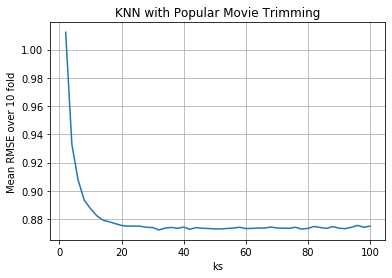

In [0]:
ks = np.linspace(2,100,50, dtype='int16') 
plt.plot(ks, results)
plt.xlabel('ks')
plt.ylabel('Mean RMSE over 10 fold')
plt.title('KNN with Popular Movie Trimming')
plt.grid()

In [0]:
print('Lowest Mean RMSE: ', min(results))



Lowest Mean RMSE:  0.8722599541755158


# Question 13

In [0]:
#!pip install scikit-surprise
from surprise.model_selection import KFold
import pandas as pd
from surprise import accuracy
from surprise import Reader
from surprise import Dataset
from surprise.prediction_algorithms.knns import KNNWithMeans
from surprise.model_selection import cross_validate
from surprise.similarities import pearson
from surprise import Dataset
def getDF():
  userId_values=ratings_csv.userId.values
  movieId_values=ratings_csv.movieId.values
  rating_values=ratings_csv.rating.values
  ratings_dic={'movieId': movieId_values,
              'userId': userId_values,
              'rating': rating_values
              }
  df=pd.DataFrame(ratings_dic)
  reader=Reader(rating_scale=(0,5))
  data=Dataset.load_from_df(df[['userId','movieId','rating']],reader)
  return data
sim_options = {'name': 'pearson'}
mean_rmse = []
mean_mae = []
data = getDF()

kf = KFold(n_splits=10)
results=np.zeros(50)
for j in range(50):
  algo = KNNWithMeans(k=2*(j+1), sim_options=sim_options, verbose=False)
  prediction=np.zeros(10)
  index_k=0
  for trainset, testset in kf.split(data):
    temp_testset=testset
    #print(trainset)
    #print(len(temp_testset))
    new_testset=[]
    new_testset = np.asarray(testset)[np.in1d(np.asarray(temp_testset)[:,1] ,small_r_movieId.values)]
    #print(new_testset.shape)
    algo.fit(trainset)
    prediction[index_k]=accuracy.rmse(algo.test(new_testset.tolist()),verbose=False)
    index_k+=1
  print('RMSE: ', prediction.mean())
  results[j]=prediction.mean()

RMSE:  1.1186084149540885
RMSE:  1.1103512890583258
RMSE:  1.1152148817219025
RMSE:  1.1141934000887879
RMSE:  1.1206954350570344
RMSE:  1.1164332264887418
RMSE:  1.1199399334665352
RMSE:  1.1159845424402417
RMSE:  1.1216983002352112
RMSE:  1.1186191085151438
RMSE:  1.115132627363708
RMSE:  1.1199005960857122
RMSE:  1.1224336692232535
RMSE:  1.1191940856659177
RMSE:  1.1178277201869453
RMSE:  1.1156868896609475
RMSE:  1.1104116305021716
RMSE:  1.120720264638152
RMSE:  1.1203968743750483
RMSE:  1.1149941159185044
RMSE:  1.117335665693681
RMSE:  1.1255997479011501
RMSE:  1.1189959521473452
RMSE:  1.1175752866855977
RMSE:  1.1195427365960364
RMSE:  1.117392958044301
RMSE:  1.1177838694265583
RMSE:  1.1195160663649781
RMSE:  1.1241348254844072
RMSE:  1.1187601181058133
RMSE:  1.122356472001313
RMSE:  1.1191760241397353
RMSE:  1.1168136155118855
RMSE:  1.120921214112535
RMSE:  1.1177241951571246
RMSE:  1.1146632937336942
RMSE:  1.1251821028910491
RMSE:  1.1220307738601347
RMSE:  1.118718711

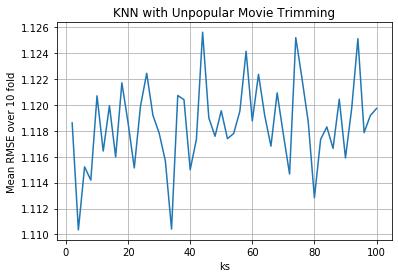

In [0]:
ks = np.linspace(2,100,50, dtype='int16') 
plt.plot(ks, results)
plt.xlabel('ks')
plt.ylabel('Mean RMSE over 10 fold')
plt.title('KNN with Unpopular Movie Trimming')
plt.grid()

In [0]:
print('Lowest Mean RMSE: ', min(results))


Lowest Mean RMSE:  1.1103512890583258


In [0]:
from surprise.model_selection import KFold
import pandas as pd
from surprise import accuracy
from surprise import Reader
from surprise import Dataset
from surprise.prediction_algorithms.knns import KNNWithMeans
from surprise.model_selection import cross_validate
from surprise.similarities import pearson
from surprise import Dataset
def getDF():
  userId_values=ratings_csv.userId.values
  movieId_values=ratings_csv.movieId.values
  rating_values=ratings_csv.rating.values
  ratings_dic={'movieId': movieId_values,
              'userId': userId_values,
              'rating': rating_values
              }
  df=pd.DataFrame(ratings_dic)
  reader=Reader(rating_scale=(0,5))
  data=Dataset.load_from_df(df[['userId','movieId','rating']],reader)
  return data

In [0]:
#!pip install scikit-surprise
from surprise.model_selection import KFold
import pandas as pd
from surprise import accuracy
from surprise import Reader
from surprise import Dataset
from surprise.prediction_algorithms.knns import KNNWithMeans
from surprise.model_selection import cross_validate
from surprise.similarities import pearson
from surprise import Dataset
def getDF():
  userId_values=ratings_csv.userId.values
  movieId_values=ratings_csv.movieId.values
  rating_values=ratings_csv.rating.values
  ratings_dic={'movieId': movieId_values,
              'userId': userId_values,
              'rating': rating_values
              }
  df=pd.DataFrame(ratings_dic)
  reader=Reader(rating_scale=(0,5))
  data=Dataset.load_from_df(df[['userId','movieId','rating']],reader)
  return data
sim_options = {'name': 'pearson'}
mean_rmse = []
mean_mae = []
data = getDF()

kf = KFold(n_splits=10)
results=np.zeros(50)
for j in range(50):
  algo = KNNWithMeans(k=2*(j+1), sim_options=sim_options, verbose=False)
  prediction=np.zeros(10)
  index_k=0
  for trainset, testset in kf.split(data):
    temp_testset=testset
    #print(trainset)
    #print(len(temp_testset))
    new_testset=[]
    new_testset = np.asarray(testset)[np.in1d(np.asarray(temp_testset)[:,1] ,small_r_movieId.values)]
    #print(new_testset.shape)
    algo.fit(trainset)
    prediction[index_k]=accuracy.rmse(algo.test(new_testset.tolist()),verbose=False)
    index_k+=1
  print('RMSE: ', prediction.mean())
  results[j]=prediction.mean()

RMSE:  1.1186084149540885
RMSE:  1.1103512890583258
RMSE:  1.1152148817219025
RMSE:  1.1141934000887879
RMSE:  1.1206954350570344
RMSE:  1.1164332264887418
RMSE:  1.1199399334665352
RMSE:  1.1159845424402417
RMSE:  1.1216983002352112
RMSE:  1.1186191085151438
RMSE:  1.115132627363708
RMSE:  1.1199005960857122
RMSE:  1.1224336692232535
RMSE:  1.1191940856659177
RMSE:  1.1178277201869453
RMSE:  1.1156868896609475
RMSE:  1.1104116305021716
RMSE:  1.120720264638152
RMSE:  1.1203968743750483
RMSE:  1.1149941159185044
RMSE:  1.117335665693681
RMSE:  1.1255997479011501
RMSE:  1.1189959521473452
RMSE:  1.1175752866855977
RMSE:  1.1195427365960364
RMSE:  1.117392958044301
RMSE:  1.1177838694265583
RMSE:  1.1195160663649781
RMSE:  1.1241348254844072
RMSE:  1.1187601181058133
RMSE:  1.122356472001313
RMSE:  1.1191760241397353
RMSE:  1.1168136155118855
RMSE:  1.120921214112535
RMSE:  1.1177241951571246
RMSE:  1.1146632937336942
RMSE:  1.1251821028910491
RMSE:  1.1220307738601347
RMSE:  1.118718711

# Question 14

In [0]:
#!pip install scikit-surprise
from surprise.model_selection import KFold
import pandas as pd
from surprise import accuracy
from surprise import Reader
from surprise import Dataset
from surprise.prediction_algorithms.knns import KNNWithMeans
from surprise.model_selection import cross_validate
from surprise.similarities import pearson
from surprise import Dataset
def getDF():
  userId_values=ratings_csv.userId.values
  movieId_values=ratings_csv.movieId.values
  rating_values=ratings_csv.rating.values
  ratings_dic={'movieId': movieId_values,
              'userId': userId_values,
              'rating': rating_values
              }
  df=pd.DataFrame(ratings_dic)
  reader=Reader(rating_scale=(0,5))
  data=Dataset.load_from_df(df[['userId','movieId','rating']],reader)
  return data
sim_options = {'name': 'pearson'}
mean_rmse = []
mean_mae = []
data = getDF()

kf = KFold(n_splits=10)
results=np.zeros(50)
for j in range(50):
  algo = KNNWithMeans(k=2*(j+1), sim_options=sim_options, verbose=False)
  prediction=np.zeros(10)
  index_k=0
  for trainset, testset in kf.split(data):
    temp_testset=testset
    new_testset=[]
    new_testset = np.asarray(testset)[(np.in1d(np.asarray(temp_testset)[:,1] ,var_trim_movieId.values))]
    algo.fit(trainset)
    prediction[index_k]=accuracy.rmse(algo.test(new_testset.tolist()),verbose=True)
    index_k+=1
  results[j]=prediction.mean()

RMSE: 1.1618
RMSE: 1.1781
RMSE: 1.2205
RMSE: 1.2138
RMSE: 1.1573
RMSE: 1.1857
RMSE: 1.1628
RMSE: 1.1752
RMSE: 1.1941
RMSE: 1.1121
RMSE: 1.1558
RMSE: 1.2232
RMSE: 1.1740
RMSE: 1.1920
RMSE: 1.1473
RMSE: 1.2046
RMSE: 1.1942
RMSE: 1.1896
RMSE: 1.1941
RMSE: 1.1509
RMSE: 1.1759
RMSE: 1.1260
RMSE: 1.1816
RMSE: 1.1763
RMSE: 1.1868
RMSE: 1.1381
RMSE: 1.1529
RMSE: 1.1962
RMSE: 1.1860
RMSE: 1.1706
RMSE: 1.1958
RMSE: 1.2169
RMSE: 1.1838
RMSE: 1.0753
RMSE: 1.1900
RMSE: 1.1796
RMSE: 1.2292
RMSE: 1.1187
RMSE: 1.1757
RMSE: 1.1922
RMSE: 1.1638
RMSE: 1.1349
RMSE: 1.1485
RMSE: 1.1523
RMSE: 1.2307
RMSE: 1.1967
RMSE: 1.1266
RMSE: 1.1551
RMSE: 1.2027
RMSE: 1.1680
RMSE: 1.1630
RMSE: 1.2002
RMSE: 1.1628
RMSE: 1.1874
RMSE: 1.1186
RMSE: 1.1358
RMSE: 1.2241
RMSE: 1.1090
RMSE: 1.2164
RMSE: 1.1958
RMSE: 1.1975
RMSE: 1.1522
RMSE: 1.1907
RMSE: 1.1752
RMSE: 1.1733
RMSE: 1.1627
RMSE: 1.1518
RMSE: 1.1417
RMSE: 1.2000
RMSE: 1.1960
RMSE: 1.1407
RMSE: 1.1311
RMSE: 1.1984
RMSE: 1.2175
RMSE: 1.1454
RMSE: 1.2402
RMSE: 1.1234

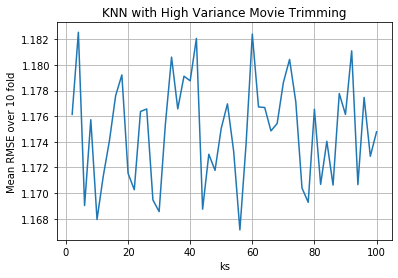

In [0]:
ks = np.linspace(2,100,50, dtype='int16') 
plt.plot(ks, results)
plt.xlabel('ks')
plt.ylabel('Mean RMSE over 10 fold')
plt.title('KNN with High Variance Movie Trimming')
plt.grid()

In [0]:
print('Lowest Mean RMSE: ', min(mean_rmse))

# Question 15

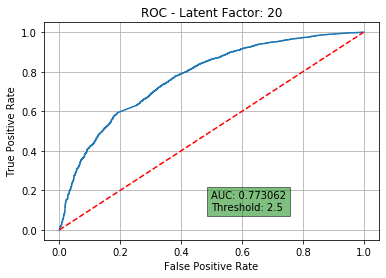

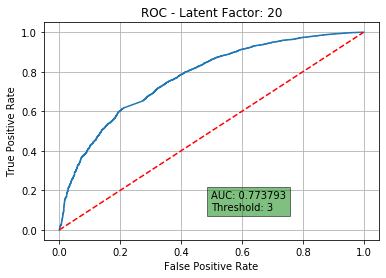

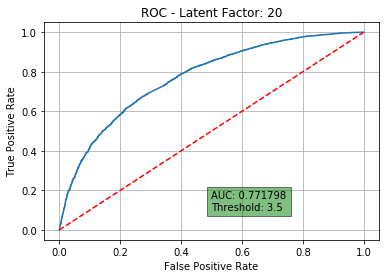

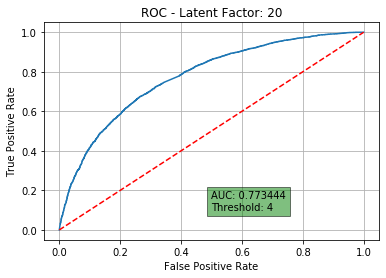

In [0]:
#!pip install scikit-surprise
from surprise import accuracy
from sklearn import metrics
import numpy as np

from surprise.prediction_algorithms.knns import KNNWithMeans
from surprise.model_selection import KFold
from surprise.model_selection import train_test_split
import matplotlib.pyplot as plt


def plotROC(algo,trainset,testset,title): 
  #kf = KFold(n_splits=10)
  algo.fit(trainset)
  predictions = algo.test(testset)
  thresh_val=[2.5,3,3.5,4]
  r_ui = [predictions[i].r_ui for i in np.arange(len(predictions))]
  est= [predictions[i].est for i in np.arange(len(predictions))]
  r_ui = np.array(r_ui)
  est = np.array(est)
  for i in range(len(thresh_val)):
    binary_val=(r_ui>=thresh_val[i])*np.ones(len(r_ui))
    fpr, tpr, threshhold = metrics.roc_curve(binary_val, est, pos_label=1)
    auc_score=metrics.auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot(np.linspace(0,1,fpr.shape[0]),np.linspace(0,1,fpr.shape[0]),'r--')
    plt.title(title)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.grid()
    plt.text(0.5,0.1,'AUC: {}\nThreshold: {}'.format(np.round(auc_score,6),thresh_val[i]), bbox=dict(facecolor='green', alpha=0.5))
    plt.show()

algo = KNNWithMeans(k=20, sim_options={'name': 'pearson'},verbose=False)
data = getDF()
trainset, testset = train_test_split(data, test_size=.10)
plotROC(algo, trainset, testset,title='ROC - Latent Factor: 20')

# Model Based Collaborative Filtering

**NNMF**

# Question 16

# Question 17

Design a NNMF-based collaborative filter to predict the ratings of the movies in the MovieLens dataset and evaluate it’s performance using 10-fold cross-validation. Sweep k (number of latent factors) from 2 to 50 in step sizes of 2, and for each k compute the average RMSE and average MAE obtained by averaging the RMSE and MAE across all 10 folds. Plot the average RMSE (Y-axis) against k (X-axis) and the average MAE (Y-axis) against k (X-axis). For solving this question, use the default value for the regularization parameter

In [0]:
def getDF():
  userId_values=ratings_csv.userId.values
  movieId_values=ratings_csv.movieId.values
  rating_values=ratings_csv.rating.values
  ratings_dic={'movieId': movieId_values,
              'userId': userId_values,
              'rating': rating_values
              }
  df=pd.DataFrame(ratings_dic)
  reader=Reader(rating_scale=(0,5))
  data=Dataset.load_from_df(df[['userId','movieId','rating']],reader)
  return data
  from surprise import accuracy
from sklearn import metrics
import numpy as np

from surprise.prediction_algorithms.knns import KNNWithMeans
from surprise.model_selection import KFold
from surprise.model_selection import train_test_split
import matplotlib.pyplot as plt
from surprise.prediction_algorithms.matrix_factorization import NMF
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise import Dataset

In [0]:
!pip install scikit-surprise
from surprise.prediction_algorithms.matrix_factorization import NMF
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise import Dataset
NNMF_experiments_rmse = []
NNMF_experiments_mae = []
#NNMF Without Filtering
ks = np.linspace(2,50,25, dtype='int16') 
mean_rmse = []
mean_mae = []
data = getDF()
for i in range(len(ks)):
  nmf = NMF(n_factors=ks[i], biased=False)
  results = cross_validate(nmf, data, measures=['RMSE', 'MAE'], cv=10, verbose=False)
  mean_rmse.append(results['test_rmse'].mean())
  mean_mae.append(results['test_mae'].mean())
  print('Latent Factor(k): ', ks[i])
  print('Mean RMSE: ', results['test_rmse'].mean())
print('Lowest Mean RMSE: ', min(mean_rmse))
print('Optimal Latent Factor(k): ', ks[np.array(mean_rmse).argmin()])
print('Lowest Mean MAE: ', min(mean_mae))
print('Optimal Latent Factor(k): ', ks[np.array(mean_mae).argmin()])
NNMF_experiments_rmse.append(mean_rmse)
NNMF_experiments_mae.append(mean_mae)

Latent Factor(k):  2
Mean RMSE:  1.1447584104827269
Latent Factor(k):  4
Mean RMSE:  1.0413187539868853
Latent Factor(k):  6
Mean RMSE:  0.9832401038860311
Latent Factor(k):  8
Mean RMSE:  0.9477351451915688
Latent Factor(k):  10
Mean RMSE:  0.9312183245431335
Latent Factor(k):  12
Mean RMSE:  0.9238935918800835
Latent Factor(k):  14
Mean RMSE:  0.9164785911941842
Latent Factor(k):  16
Mean RMSE:  0.9128382513361336
Latent Factor(k):  18
Mean RMSE:  0.9136545421152823
Latent Factor(k):  20
Mean RMSE:  0.9177660288134195
Latent Factor(k):  22
Mean RMSE:  0.9166710098646786
Latent Factor(k):  24
Mean RMSE:  0.9190812178545121
Latent Factor(k):  26
Mean RMSE:  0.9222188230328777
Latent Factor(k):  28
Mean RMSE:  0.9285554179413884
Latent Factor(k):  30
Mean RMSE:  0.9301307047445444
Latent Factor(k):  32
Mean RMSE:  0.9350258765781725
Latent Factor(k):  34
Mean RMSE:  0.9380072683922333
Latent Factor(k):  36
Mean RMSE:  0.9418512559752802
Latent Factor(k):  38
Mean RMSE:  0.94779180929659

In [0]:
print('Lowest Mean RMSE: ', min(mean_rmse))
print('Optimal Latent Factor(k): ', ks[np.array(mean_rmse).argmin()])
print('Lowest Mean MAE: ', min(mean_mae))
print('Optimal Latent Factor(k): ', ks[np.array(mean_mae).argmin()])

ValueError: ignored

In [0]:
plt.plot(ks, mean_rmse)
plt.xlabel('ks')
plt.ylabel('Mean RMSE over 10 fold')
plt.title('NNMF - Unfiltered Test Set')
plt.grid()

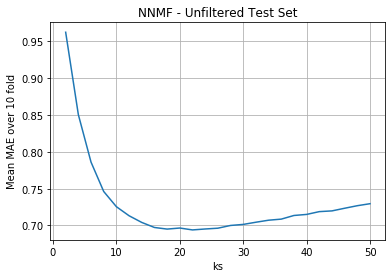

In [0]:
plt.plot(ks, mean_mae)
plt.xlabel('ks')
plt.ylabel('Mean MAE over 10 fold')
plt.title('NNMF - Unfiltered Test Set')
plt.grid()

# Question 18

In [0]:
bbox = dict(boxstyle="round", fc="0.8")
plt.plot(ks, mean_rmse)
plt.annotate(s='K= '+str(16) +' RMSE='+ str(np.round(mean_rmse[15],6)),xy=(15,mean_rmse[15]+0.01),bbox=bbox,rotation=90)
plt.xlabel('ks')
plt.ylabel('Mean RMSE over 10 fold')
plt.title('NNMF - Unfiltered Test Set')
plt.grid()
plt.show()

In [0]:
bbox = dict(boxstyle="round", fc="0.8")
plt.plot(ks, mean_mae)
plt.annotate(s='K= '+str(16) +' MAE='+ str(np.round(mean_mae[15],6)),xy=(15,mean_mae[15]+0.01),bbox=bbox,rotation=90)
plt.xlabel('ks')
plt.ylabel('Mean MAE over 10 fold')
plt.title('NNMF - Unfiltered Test Set')
plt.grid()
plt.show()

In [0]:
#Finding optimal k values
print('Lowest Mean RMSE: ', min(NNMF_experiments_rmse[0]))
print('Optimal Latent Factor(k) ~RMSE: ', ks[np.array(NNMF_experiments_rmse[0]).argmin()])
print('Lowest Mean MAE: ', min(NNMF_experiments_mae[0]))
print('Optimal Latent Factor(k) ~MAE: ', ks[np.array(NNMF_experiments_mae[0]).argmin()])


# Question 19

In [0]:
#Popular Trimming with NNMF
data = getDF()
from surprise.model_selection import KFold
kf = KFold(n_splits=10)
results=np.zeros(len(ks))
for i in range(len(ks)):
  nmf = NMF(n_factors=ks[i], biased=False)
  prediction=np.zeros(10)
  index_k=0
  for trainset, testset in kf.split(data):
    temp_testset=testset
    new_testset=[]
    new_testset = np.asarray(testset)[np.invert(np.in1d(np.asarray(temp_testset)[:,1] ,small_r_movieId.values))]
    nmf.fit(trainset)
    prediction[index_k]=accuracy.rmse(nmf.test(new_testset.tolist()),verbose=False)
    index_k+=1
  results[i]=prediction.mean()
  print('Latent Factor(k): ', ks[i])
  print('Mean RMSE: ',results[i])
print('Lowest Mean RMSE: ', min(results))
print('Optimal Latent Factor(k): ', ks[np.array(results).argmin()])
NNMF_experiments_rmse.append(results)

Latent Factor(k):  2
Mean RMSE:  1.1368769042777624
Latent Factor(k):  4
Mean RMSE:  1.0263978559279687
Latent Factor(k):  6
Mean RMSE:  0.9665425399051785
Latent Factor(k):  8
Mean RMSE:  0.9295718345621669
Latent Factor(k):  10
Mean RMSE:  0.9109351233240932
Latent Factor(k):  12
Mean RMSE:  0.899534464732197
Latent Factor(k):  14
Mean RMSE:  0.8952651489990207
Latent Factor(k):  16
Mean RMSE:  0.8934363726149466
Latent Factor(k):  18
Mean RMSE:  0.8939959502591392
Latent Factor(k):  20
Mean RMSE:  0.8936186560000292
Latent Factor(k):  22
Mean RMSE:  0.8957946506775445
Latent Factor(k):  24
Mean RMSE:  0.9005869230424455
Latent Factor(k):  26
Mean RMSE:  0.9049302412704755
Latent Factor(k):  28
Mean RMSE:  0.9068191781863997
Latent Factor(k):  30
Mean RMSE:  0.914695629835772
Latent Factor(k):  32
Mean RMSE:  0.9164527250476808
Latent Factor(k):  34
Mean RMSE:  0.9180165150259221
Latent Factor(k):  36
Mean RMSE:  0.9251601822824999
Latent Factor(k):  38
Mean RMSE:  0.9285182362246369

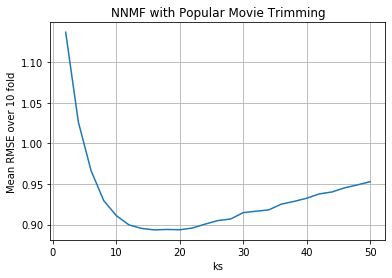

In [0]:
plt.plot(ks, results)
plt.xlabel('ks')
plt.ylabel('Mean RMSE over 10 fold')
plt.title('NNMF with Popular Movie Trimming')
plt.grid()

# Question 20

In [0]:
#Unpopular Trimming with NNMF
data = getDF()
kf = KFold(n_splits=10)
results=np.zeros(len(ks))
for i in range(len(ks)):
  nmf = NMF(n_factors=ks[i], biased=False)
  prediction=np.zeros(10)
  index_k=0
  for trainset, testset in kf.split(data):
    temp_testset=testset
    new_testset=[]
    new_testset = np.asarray(testset)[np.in1d(np.asarray(temp_testset)[:,1] ,small_r_movieId.values)]
    nmf.fit(trainset)
    prediction[index_k]=accuracy.rmse(nmf.test(new_testset.tolist()),verbose=False)
    index_k+=1
  results[i]=prediction.mean()
  print('Latent Factor(k): ', ks[i])
  print('Mean RMSE: ',results[i])
print('Lowest Mean RMSE: ', min(results))
print('Optimal Latent Factor(k): ', ks[np.array(results).argmin()])
NNMF_experiments_rmse.append(results)

Latent Factor(k):  2
Mean RMSE:  1.237204379637603
Latent Factor(k):  4
Mean RMSE:  1.2321753670704945
Latent Factor(k):  6
Mean RMSE:  1.218894350571143
Latent Factor(k):  8
Mean RMSE:  1.2191665590985132
Latent Factor(k):  10
Mean RMSE:  1.2007965935763558
Latent Factor(k):  12
Mean RMSE:  1.1966540122821312
Latent Factor(k):  14
Mean RMSE:  1.1985862957678954
Latent Factor(k):  16
Mean RMSE:  1.1970418560774783
Latent Factor(k):  18
Mean RMSE:  1.1945852168382207
Latent Factor(k):  20
Mean RMSE:  1.191175042183263
Latent Factor(k):  22
Mean RMSE:  1.1940770883162408
Latent Factor(k):  24
Mean RMSE:  1.186907243807589
Latent Factor(k):  26
Mean RMSE:  1.1797433901007577
Latent Factor(k):  28
Mean RMSE:  1.1826009926656453
Latent Factor(k):  30
Mean RMSE:  1.1838333489767296
Latent Factor(k):  32
Mean RMSE:  1.1825494330287183
Latent Factor(k):  34
Mean RMSE:  1.1834392695522469
Latent Factor(k):  36
Mean RMSE:  1.1758880594146233
Latent Factor(k):  38
Mean RMSE:  1.1847656271494882
L

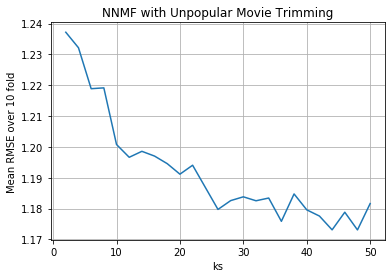

In [0]:
plt.plot(ks, results)
plt.xlabel('ks')
plt.ylabel('Mean RMSE over 10 fold')
plt.title('NNMF with Unpopular Movie Trimming')
plt.grid()

#Question 21

In [0]:
#High Variance Trimming with NNMF
data = getDF()
ks = np.linspace(2,50,25, dtype='int16') 
kf = KFold(n_splits=10)
results=np.zeros(len(ks))
for i in range(len(ks)):
  nmf = NMF(n_factors=ks[i], biased=False)
  prediction=np.zeros(10)
  index_k=0
  for trainset, testset in kf.split(data):
    temp_testset=testset
    new_testset=[]
    new_testset = np.asarray(testset)[(np.in1d(np.asarray(temp_testset)[:,1] ,var_trim_movieId.values))]
    nmf.fit(trainset)
    prediction[index_k]=accuracy.rmse(nmf.test(new_testset.tolist()),verbose=False)
    index_k+=1
  results[i]=prediction.mean()
  print('Latent Factor(k): ', ks[i])
  print('Mean RMSE: ',results[i])
print('Lowest Mean RMSE: ', min(results))
print('Optimal Latent Factor(k): ', ks[np.array(results).argmin()])
NNMF_experiments_rmse.append(results)

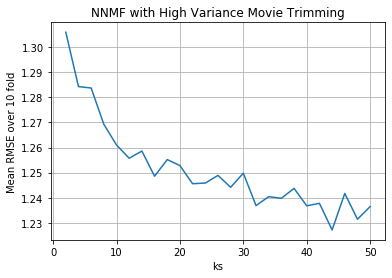

In [0]:
plt.plot(ks, results)
plt.xlabel('ks')
plt.ylabel('Mean RMSE over 10 fold')
plt.title('NNMF with High Variance Movie Trimming')
plt.grid()

# Question 22

ROC Curves for NNMF

In [0]:
#Finding optimal k values
print('Lowest Mean RMSE: ', min(NNMF_experiments_rmse[0]))
print('Optimal Latent Factor(k) ~RMSE: ', ks[np.array(NNMF_experiments_rmse[0]).argmin()])
print('Lowest Mean MAE: ', min(NNMF_experiments_mae[0]))
print('Optimal Latent Factor(k) ~MAE: ', ks[np.array(NNMF_experiments_mae[0]).argmin()])


In [0]:
#Draw ROC Curves (k=16)
algo = NMF(n_factors=16, biased=False)
data = getDF()
trainset, testset = train_test_split(data, test_size=.10)
plotROC(algo, trainset, testset,title='ROC - Latent Factor: {}'.format(16))


# Question 23

In [0]:
from surprise.model_selection import train_test_split
algo = NMF(n_factors=20, biased=False)
data = getDF()
trainset, testset = train_test_split(data, test_size=.10)
algo.fit(trainset)
v=algo.qi
movie_ids = []
for item in trainset.all_items():
  movie_ids.append(trainset.to_raw_iid(item))

for i in range(v.shape[1]):
  temp_mov=v[:,i]
  sort_index=np.argsort(temp_mov)[::-1]
  top_10_genres=movies_csv.genres.values[np.in1d(movies_csv.movieId.values,np.array(movie_ids)[(sort_index[:10])])].tolist()
  print(i)
  print(top_10_genres)






0
['Drama', 'Drama', 'Action|Drama|War', 'Action|Comedy', 'Drama|Romance', 'Crime|Drama|Fantasy|Mystery|Thriller', 'Action|Adventure|Sci-Fi|Thriller', 'Comedy|Drama|Romance', 'Drama|Romance', 'Action|Horror|Sci-Fi']
1
['Action|Sci-Fi', 'Comedy|Drama|Romance', 'Comedy', 'Comedy', 'Action|Drama', 'Action|Comedy|Horror|Sci-Fi', 'Action|Comedy|Crime|Fantasy', 'Action|Comedy|Crime|Thriller', 'Comedy|Romance|Thriller', 'Adventure|Animation|Children|Comedy']
2
['Drama|Romance', 'Drama|Horror|Mystery|Thriller', 'Children|Comedy|Fantasy|Romance', 'Animation|Children|Comedy', 'Adventure|Thriller', 'Comedy', 'Drama', 'Adventure|Comedy|Fantasy', 'Action|Comedy', 'Comedy|Drama|Romance']
3
['Adventure|Animation|Children|Musical', 'Children|Comedy|Drama', 'Comedy|Drama', 'Drama|Fantasy|Mystery', 'Drama', 'Animation|Children', 'Drama', 'Drama|Fantasy|Sci-Fi', 'Comedy|Documentary|Drama|Romance', 'Drama']
4
['Drama|Horror|Sci-Fi', 'Drama|Romance', 'Comedy', 'Drama', 'Drama|Thriller', 'Action|Drama', 'Co

In [0]:
len(movie_ids)

8716

In [0]:
v.shape

(8716, 20)

# Question 24

SVD With Bias

In [0]:
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise import Dataset
SVD_experiments_rmse = []
SVD_experiments_mae = []
#SVD Without Filtering
ks = np.linspace(2,50,25, dtype='int16') 
mean_rmse = []
mean_mae = []
data = getDF()
for i in range(len(ks)):
  svd = SVD(n_factors=ks[i], biased=True)
  results = cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=10, verbose=False)
  mean_rmse.append(results['test_rmse'].mean())
  mean_mae.append(results['test_mae'].mean())
  print('Latent Factor(k): ', ks[i])
  print('Mean RMSE: ', results['test_rmse'].mean())
print('Lowest Mean RMSE: ', min(mean_rmse))
print('Optimal Latent Factor(k): ', ks[np.array(mean_rmse).argmin()])
SVD_experiments_rmse.append(mean_rmse)
SVD_experiments_mae.append(mean_mae)

Latent Factor(k):  2
Mean RMSE:  0.8667515666666837
Latent Factor(k):  4
Mean RMSE:  0.8664244311036281
Latent Factor(k):  6
Mean RMSE:  0.8664393798172766
Latent Factor(k):  8
Mean RMSE:  0.8663615637103085
Latent Factor(k):  10
Mean RMSE:  0.8667962922523106
Latent Factor(k):  12
Mean RMSE:  0.8665771617040768
Latent Factor(k):  14
Mean RMSE:  0.8661695960700693
Latent Factor(k):  16
Mean RMSE:  0.8667762012490063
Latent Factor(k):  18
Mean RMSE:  0.865944429509845
Latent Factor(k):  20
Mean RMSE:  0.8665071716094553
Latent Factor(k):  22
Mean RMSE:  0.8660573527203554
Latent Factor(k):  24
Mean RMSE:  0.8660225664449168
Latent Factor(k):  26
Mean RMSE:  0.8653385999834201
Latent Factor(k):  28
Mean RMSE:  0.8660927300309641
Latent Factor(k):  30
Mean RMSE:  0.8661205873745882
Latent Factor(k):  32
Mean RMSE:  0.8664863335021252
Latent Factor(k):  34
Mean RMSE:  0.8659492562242841
Latent Factor(k):  36
Mean RMSE:  0.867223950095703
Latent Factor(k):  38
Mean RMSE:  0.8653674806137361

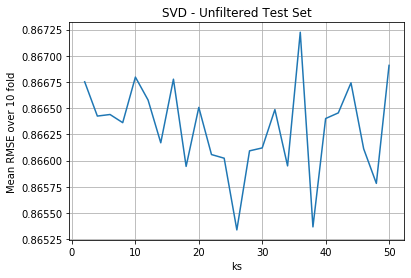

In [0]:
plt.plot(ks, mean_rmse)
plt.xlabel('ks')
plt.ylabel('Mean RMSE over 10 fold')
plt.title('SVD - Unfiltered Test Set')
plt.grid()

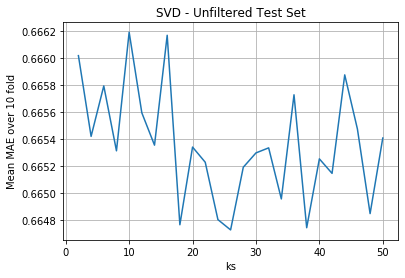

In [0]:
plt.plot(ks, mean_mae)
plt.xlabel('ks')
plt.ylabel('Mean MAE over 10 fold')
plt.title('SVD - Unfiltered Test Set')
plt.grid()

#Question 25

In [0]:
ks = np.linspace(2,100,50, dtype='int16') 
plt.plot(ks, mean_rmse)
plt.annotate(s='K= '+str(20) +' RMSE='+ str(np.round(mean_rmse[19],6)),xy=(20,mean_rmse[19]+0.01),bbox=bbox,rotation=90)
plt.xlabel('ks')
plt.ylabel('Mean RMSE over 10 fold')
plt.title('KNNWithMeans - Unfiltered Test Set')
plt.grid()


#Finding optimal k values
print('Lowest Mean RMSE: ', min(SVD_experiments_rmse[0]))
print('Optimal Latent Factor(k) ~RMSE: ', ks[np.array(SVD_experiments_rmse[0]).argmin()])
print('Lowest Mean MAE: ', min(SVD_experiments_mae[0]))
print('Optimal Latent Factor(k) ~MAE: ', ks[np.array(SVD_experiments_mae[0]).argmin()])


# Question 26

In [0]:
#Popular Trimming with SVD
data = getDF()

kf = KFold(n_splits=10)
results=np.zeros(len(ks))
for i in range(len(ks)):
  svd = SVD(n_factors=ks[i], biased=True)
  prediction=np.zeros(10)
  index_k=0
  for trainset, testset in kf.split(data):
    temp_testset=testset
    new_testset=[]
    new_testset = np.asarray(testset)[np.invert(np.in1d(np.asarray(temp_testset)[:,1] ,small_r_movieId.values))]
    svd.fit(trainset)
    prediction[index_k]=accuracy.rmse(svd.test(new_testset.tolist()),verbose=False)
    index_k+=1
  results[i]=prediction.mean()
  print('Latent Factor(k): ', ks[i])
  print('Mean RMSE: ',results[i])
print('Lowest Mean RMSE: ', min(results))
print('Optimal Latent Factor(k): ', ks[np.array(results).argmin()])
SVD_experiments_rmse.append(results)

Latent Factor(k):  2
Mean RMSE:  0.8592401390676537
Latent Factor(k):  4
Mean RMSE:  0.859672632554281
Latent Factor(k):  6
Mean RMSE:  0.8586248340118136
Latent Factor(k):  8
Mean RMSE:  0.8587696853229758
Latent Factor(k):  10
Mean RMSE:  0.8593812185573595
Latent Factor(k):  12
Mean RMSE:  0.8589317786127106
Latent Factor(k):  14
Mean RMSE:  0.858729054394279
Latent Factor(k):  16
Mean RMSE:  0.8592295163843551
Latent Factor(k):  18
Mean RMSE:  0.8590677746667993
Latent Factor(k):  20
Mean RMSE:  0.8589751368618856
Latent Factor(k):  22
Mean RMSE:  0.8587946892735332
Latent Factor(k):  24
Mean RMSE:  0.8587677769663673
Latent Factor(k):  26
Mean RMSE:  0.8590043813986167
Latent Factor(k):  28
Mean RMSE:  0.8595433478428669
Latent Factor(k):  30
Mean RMSE:  0.8583959883370451
Latent Factor(k):  32
Mean RMSE:  0.8591541053625347
Latent Factor(k):  34
Mean RMSE:  0.8583349313295319
Latent Factor(k):  36
Mean RMSE:  0.8582832289354754
Latent Factor(k):  38
Mean RMSE:  0.8590402995224216

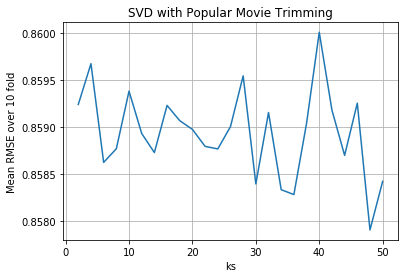

In [0]:
plt.plot(ks, results)
plt.xlabel('ks')
plt.ylabel('Mean RMSE over 10 fold')
plt.title('SVD with Popular Movie Trimming')
plt.grid()

# Question 27

In [0]:
#Unpopular Trimming with SVD
data = getDF()
kf = KFold(n_splits=10)
results=np.zeros(len(ks))
for i in range(len(ks)):
  svd = SVD(n_factors=ks[i], biased=True)
  prediction=np.zeros(10)
  index_k=0
  for trainset, testset in kf.split(data):
    temp_testset=testset
    new_testset=[]
    new_testset = np.asarray(testset)[np.in1d(np.asarray(temp_testset)[:,1] ,small_r_movieId.values)]
    svd.fit(trainset)
    prediction[index_k]=accuracy.rmse(svd.test(new_testset.tolist()),verbose=False)
    index_k+=1
  results[i]=prediction.mean()
  print('Latent Factor(k): ', ks[i])
  print('Mean RMSE: ',results[i])
print('Lowest Mean RMSE: ', min(results))
print('Optimal Latent Factor(k): ', ks[np.array(results).argmin()])
SVD_experiments_rmse.append(results)

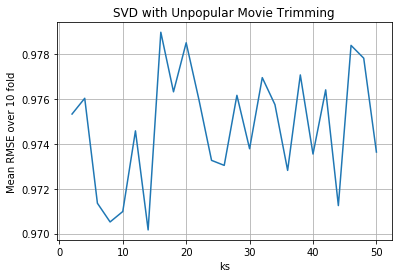

In [0]:
plt.plot(ks, results)
plt.xlabel('ks')
plt.ylabel('Mean RMSE over 10 fold')
plt.title('SVD with Unpopular Movie Trimming')
plt.grid()

# Question 28

In [0]:
#High Variance Trimming with SVD
data = getDF()
kf = KFold(n_splits=10)
results=np.zeros(len(ks))
for i in range(len(ks)):
  svd = SVD(n_factors=ks[i], biased=True)
  prediction=np.zeros(10)
  index_k=0
  for trainset, testset in kf.split(data):
    temp_testset=testset
    new_testset=[]
    new_testset = np.asarray(testset)[(np.in1d(np.asarray(temp_testset)[:,1] ,var_trim_movieId.values))]
    svd.fit(trainset)
    prediction[index_k]=accuracy.rmse(svd.test(new_testset.tolist()),verbose=False)
    index_k+=1
  results[i]=prediction.mean()
  print('Latent Factor(k): ', ks[i])
  print('Mean RMSE: ',results[i])
print('Lowest Mean RMSE: ', min(results))
print('Optimal Latent Factor(k): ', ks[np.array(results).argmin()])
SVD_experiments_rmse.append(results)

Latent Factor(k):  2
Mean RMSE:  1.5814318110242442
Latent Factor(k):  4
Mean RMSE:  1.6552970557580071
Latent Factor(k):  6
Mean RMSE:  1.6368535039613872
Latent Factor(k):  8
Mean RMSE:  1.6098376122417104
Latent Factor(k):  10
Mean RMSE:  1.5975865060727397
Latent Factor(k):  12
Mean RMSE:  1.5962366449841192
Latent Factor(k):  14
Mean RMSE:  1.6210600801827837
Latent Factor(k):  16
Mean RMSE:  1.5948206690305773
Latent Factor(k):  18
Mean RMSE:  1.6345896722865625
Latent Factor(k):  20
Mean RMSE:  1.5770952992970697
Latent Factor(k):  22
Mean RMSE:  1.6062086298265743
Latent Factor(k):  24
Mean RMSE:  1.5702673387497277
Latent Factor(k):  26
Mean RMSE:  1.6409406795134978
Latent Factor(k):  28
Mean RMSE:  1.6262019060399766
Latent Factor(k):  30
Mean RMSE:  1.5701821173915564
Latent Factor(k):  32
Mean RMSE:  1.626917613865194
Latent Factor(k):  34
Mean RMSE:  1.6366238548728809
Latent Factor(k):  36
Mean RMSE:  1.6595508469634215
Latent Factor(k):  38
Mean RMSE:  1.642630267994166

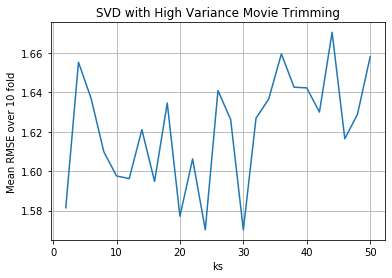

In [0]:
plt.plot(ks, results)
plt.xlabel('ks')
plt.ylabel('Mean RMSE over 10 fold')
plt.title('SVD with High Variance Movie Trimming')
plt.grid()

# Question 29

ROC Curves for MF with bias

In [0]:
#Finding optimal k values
print('Lowest Mean RMSE: ', min(SVD_experiments_rmse[0]))
print('Optimal Latent Factor(k) ~RMSE: ', ks[np.array(SVD_experiments_rmse[0]).argmin()])
print('Lowest Mean MAE: ', min(SVD_experiments_mae[0]))
print('Optimal Latent Factor(k) ~MAE: ', ks[np.array(SVD_experiments_mae[0]).argmin()])


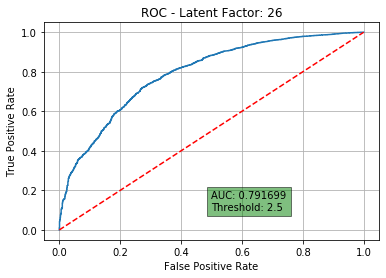

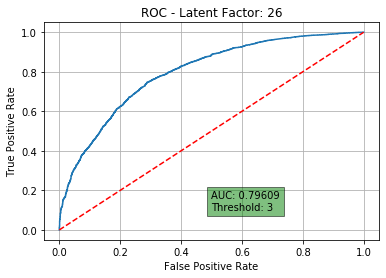

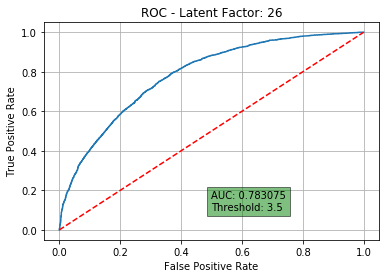

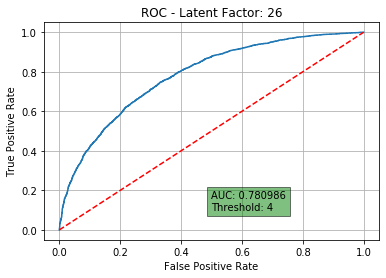

In [0]:
#Draw ROC Curves 
algo = SVD(n_factors=26, biased=True)
data = getDF()
trainset, testset = train_test_split(data, test_size=.10)
plotROC(algo, trainset, testset,title='ROC - Latent Factor: {}'.format(26))

# Question 30

In [0]:
user_num_rat=np.histogram(ratings_csv.userId.values,bins=np.linspace(1,user_count,user_count+1))[0]
rating_av = np.zeros(user_count)
for i in range(len(ratings_csv.rating)):
  rating_av[ratings_csv.userId[i]-1]+=ratings_csv.rating[i]
rating_av/=user_num_rat

In [0]:
rmse_holder=[]
data = getDF()
from sklearn.metrics import mean_squared_error
for trainset, testset in kf.split(data):
  temp_id=np.asarray(testset)[:,1]
  prediction_temp=np.zeros(np.asarray(testset).shape[0])
  prediction_temp=rating_av[np.asarray(testset,dtype=int)[:,0]-1]
  rmse_holder.append(np.sqrt(mean_squared_error(np.asarray(testset)[:,2], prediction_temp)))
  print('RMSE: ',rmse_holder[-1])
print('Mean RMSE: ',np.mean(rmse_holder))

RMSE:  0.9395747797073274
RMSE:  0.9200757025366231
RMSE:  0.9288018806139178
RMSE:  0.9307342660962228
RMSE:  0.9398587097771358
RMSE:  0.933426632283195
RMSE:  0.9288680800096942
RMSE:  0.9433430017012036
RMSE:  0.9428039265149958
RMSE:  0.9394513119432167
Mean RMSE:  0.9346938291183532


#Question 31

In [0]:
rmse_holder=[]
from sklearn.metrics import mean_squared_error
for trainset, testset in kf.split(data):
  testset = np.asarray(testset)[np.invert(np.in1d(np.asarray(testset)[:,1] ,small_r_movieId.values))]
  temp_id=np.asarray(testset)[:,1]
  prediction_temp=np.zeros(np.asarray(testset).shape[0])
  prediction_temp=rating_av[np.asarray(testset,dtype=int)[:,0]-1]
  rmse_holder.append(np.sqrt(mean_squared_error(np.asarray(testset)[:,2], prediction_temp)))
  print('RMSE: ',rmse_holder[-1])
print('Popular Movie Trimming Mean RMSE: ',np.mean(rmse_holder))

RMSE:  0.938860027000912
RMSE:  0.9260926308897106
RMSE:  0.931133030341811
RMSE:  0.9226837245754463
RMSE:  0.9331508018636337
RMSE:  0.9295139917933776
RMSE:  0.9333086980290728
RMSE:  0.9412401086065967
RMSE:  0.9441671507452621
RMSE:  0.9228943518938876
Popular Movie Trimming Mean RMSE:  0.932304451573971


#Question 32

In [0]:
rmse_holder=[]
for trainset, testset in kf.split(data):
  testset = np.asarray(testset)[(np.in1d(np.asarray(testset)[:,1] ,small_r_movieId.values))]
  temp_id=np.asarray(testset)[:,1]
  prediction_temp=np.zeros(np.asarray(testset).shape[0])
  prediction_temp=rating_av[np.asarray(testset,dtype=int)[:,0]-1]
  rmse_holder.append(np.sqrt(mean_squared_error(np.asarray(testset)[:,2], prediction_temp)))
  print('RMSE: ',rmse_holder[-1])
print('Unpopular movie Trimming Mean RMSE: ',np.mean(rmse_holder))

RMSE:  0.9602694378506633
RMSE:  0.952204712838661
RMSE:  0.9549839768590649
RMSE:  0.9312716727954529
RMSE:  0.9249583090840003
RMSE:  0.985062131938031
RMSE:  0.9708498861857182
RMSE:  1.0123782956575655
RMSE:  1.0618780905464758
RMSE:  0.9470981891759253
Unpopular movie Trimming Mean RMSE:  0.9700954702931558


#Question 33

In [0]:
rmse_holder=[]
for trainset, testset in kf.split(data):
  testset = np.asarray(testset)[(np.in1d(np.asarray(testset)[:,1] ,var_trim_movieId.values))]
  temp_id=np.asarray(testset)[:,1]
  prediction_temp=np.zeros(np.asarray(testset).shape[0])
  prediction_temp=rating_av[np.asarray(testset,dtype=int)[:,0]-1]
  rmse_holder.append(np.sqrt(mean_squared_error(np.asarray(testset)[:,2], prediction_temp)))
  print('RMSE: ',rmse_holder[-1])
print('Unpopular movie Trimming Mean RMSE: ',np.mean(rmse_holder))
    

RMSE:  0.9395746397438113
RMSE:  1.615508809588958
RMSE:  1.822156687125209
RMSE:  1.606816834900699
RMSE:  2.0055761242049295
RMSE:  1.6111012529280775
RMSE:  1.5966771824112491
RMSE:  1.196528773692741
RMSE:  1.698615421867434
RMSE:  1.3947932265918368
Unpopular movie Trimming Mean RMSE:  1.5487348953054945


In [0]:
def plotROC2(predictions,trainset,testset,title): 
  #kf = KFold(n_splits=10)
  algo.fit(trainset)
  predictions = algo.test(testset)
  thresh_val=[2.5,3,3.5,4]
  r_ui = [predictions[i].r_ui for i in np.arange(len(predictions))]
  est= [predictions[i].est for i in np.arange(len(predictions))]
  r_ui = np.array(r_ui)
  est = np.array(est)
  for i in range(len(thresh_val)):
    binary_val=(r_ui>=thresh_val[i])*np.ones(len(r_ui))
    fpr, tpr, threshhold = metrics.roc_curve(binary_val, est, pos_label=1)
    auc_score=metrics.auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot(np.linspace(0,1,fpr.shape[0]),np.linspace(0,1,fpr.shape[0]),'r--')
    plt.title(title)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.grid()
    plt.text(0.5,0.1,'AUC: {}\nThreshold: {}'.format(np.round(auc_score,6),thresh_val[i]), bbox=dict(facecolor='green', alpha=0.5))
    plt.show()
from surprise.model_selection import train_test_split


# Question 34

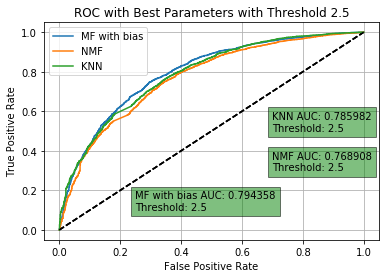

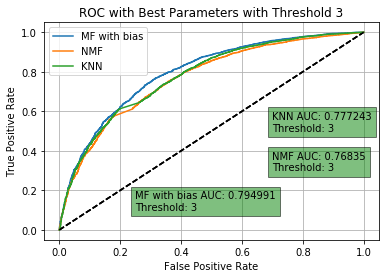

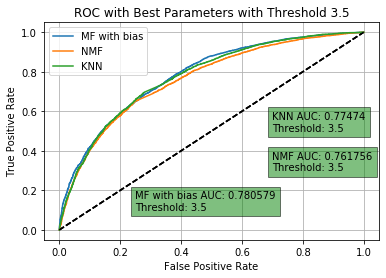

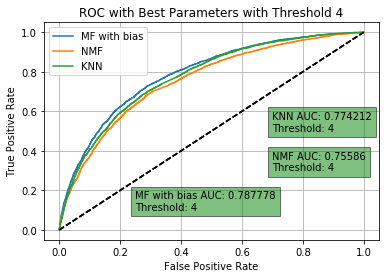

In [0]:
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise import Dataset
from surprise.model_selection import train_test_split
from surprise import accuracy
from sklearn import metrics
import numpy as np
from surprise.prediction_algorithms.matrix_factorization import NMF
def plotROC3(algo,trainset,testset,title,legend,thresh_val,locx,locy): 
  #kf = KFold(n_splits=10)
  algo.fit(trainset)
  predictions = algo.test(testset)
  #thresh_val=[2.5,3,3.5,4]
  r_ui = [predictions[i].r_ui for i in np.arange(len(predictions))]
  est= [predictions[i].est for i in np.arange(len(predictions))]
  r_ui = np.array(r_ui)
  est = np.array(est)
  
  binary_val=(r_ui>=thresh_val)*np.ones(len(r_ui))
  fpr, tpr, threshhold = metrics.roc_curve(binary_val, est, pos_label=1)
  auc_score=metrics.auc(fpr, tpr)
  #plt.figure()
  plt.plot(fpr, tpr,label=legend)
  plt.plot(np.linspace(0,1,fpr.shape[0]),np.linspace(0,1,fpr.shape[0]),'k--')
  plt.title(title)
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.grid()
  plt.legend()
  plt.text(locx,locy,str(legend)+' AUC: {}\nThreshold: {}'.format(np.round(auc_score,6),thresh_val), bbox=dict(facecolor='green', alpha=0.5))
   


thresh_val=[2.5,3,3.5,4]
for i in range (len(thresh_val)):
  algo = SVD(n_factors=26, biased=True)
  data = getDF()
  trainset, testset = train_test_split(data, test_size=.10)
  plotROC3(algo, trainset, testset,title='ROC - Latent Factor: {}'.format(26),legend='MF with bias',thresh_val=thresh_val[i],locx=0.25,locy=0.1)
  algo = NMF(n_factors=16, biased=False)
  data = getDF()
  trainset, testset = train_test_split(data, test_size=.10)
  plotROC3(algo, trainset, testset,title='ROC - Latent Factor: {}'.format(16),legend='NMF',thresh_val=thresh_val[i],locx=0.7,locy=0.3)
  algo = KNNWithMeans(k=20, sim_options={'name': 'pearson'},verbose=False)
  data = getDF()
  trainset, testset = train_test_split(data, test_size=.10)
  plotROC3(algo, trainset, testset,title='ROC with Best Parameters with Threshold '+str(thresh_val[i]),legend='KNN',thresh_val=thresh_val[i],locx=0.7,locy=0.5)
  plt.show()



# Question 35

# Question 36

In [0]:
def eval_ranking_prec_recall(predictions, t):
  uid = np.array(testset)[:,0]
  set_of_users = set(np.array(testset)[:,0]) #List - uids in the test ascending order
  gnd_truth = np.array([predictions[i].r_ui for i in np.arange(len(predictions))])
  est = np.array([predictions[i].est for i in np.arange(len(predictions))])
  #gdn_truth_filtered = np.delete(gnd_truth,np.where(gnd_truth < 3))
  users_prec = {}
  users_recall = {}
  precision = 0
  recall = 0
  actual_user_count = 0
  for user in set_of_users:
    #print(user)
    temp_est = est[np.where(uid==user)]
    temp_gnd_truth = gnd_truth[np.where(uid==user)]
    temp_gnd_truth = temp_gnd_truth[np.argsort(est[np.where(uid==user)])][::-1]
    temp_est = np.sort(temp_est)[::-1]
    
    rel = np.delete(temp_gnd_truth,np.where(temp_gnd_truth < 3))
    n_rel = np.delete(temp_gnd_truth,np.where(temp_gnd_truth < 3)).size
    
    rec_k = np.delete(temp_est[:t],np.where(temp_est[:t] < 3))
    n_rec_k = np.delete(temp_est[:t],np.where(temp_est[:t] < 3)).size

    if n_rel == 0 or n_rec_k < t:
      #print('User with UID={} has been removed!'.format(int(user)))
      continue

    actual_user_count += 1

    #temp_gnd_truth = temp_gnd_truth[np.argsort(est[np.where(uid==user)])][::-1][:t]

    temp = rec_k
    temp_est = np.delete(temp,np.where(temp_gnd_truth[:t] < 3))

    n_rel_and_rec_k = temp_est.size

    #precision_tmp = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1
    precision_tmp = n_rel_and_rec_k / n_rec_k
    precision += precision_tmp
    #recall_tmp = n_rel_and_rec_k / n_rel if n_rel != 0 else 1
    recall_tmp = n_rel_and_rec_k / n_rel
    recall += recall_tmp
    users_prec[str(int(uid[i]))] = precision
    users_recall[str(int(uid[i]))] = recall
  precision /= actual_user_count
  recall /= actual_user_count if n_rel != 0 else 1
  #print(precision)
  #print(recall)
  return precision, recall, users_prec, users_recall

In [0]:
from collections import defaultdict

def precision_recall_at_k(predictions, k=10, threshold=3.5):
    '''Return precision and recall at k metrics for each user.'''

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls

In [0]:
#k-NN collaborative filter: Precision and Recall Calcs
from surprise.model_selection import train_test_split
from surprise.model_selection import KFold
data = getDF()
trainset, testset = train_test_split(data, test_size=.10)
kf = KFold(n_splits=10)
precisions = []
recalls = []
for i in range(25):
  print('t is: ',i+1)
  prec_temp = 0
  recall_temp = 0
  for trainset, testset in kf.split(data):
    sim_options = {'name': 'pearson'}
    algo = KNNWithMeans(k=20, sim_options=sim_options, verbose=False)
    algo.fit(trainset)
    predictions=algo.test(testset)
    precision, recall = precision_recall_at_k(predictions, k=i+1, threshold=3)
    #precision, recall, users_prec, users_recall = eval_ranking_prec_recall(predictions,i+1)
    #prec_temp += precision
    #recall_temp += recall
    prec_temp += np.mean(list(precision.values()))
    recall_temp += np.mean(list(recall.values()))
  precisions.append(prec_temp/10)
  recalls.append(recall_temp/10)

  knn_precisions = precisions
  knn_recalls = recalls

t is:  1
t is:  2
t is:  3
t is:  4
t is:  5
t is:  6
t is:  7
t is:  8
t is:  9
t is:  10
t is:  11
t is:  12
t is:  13
t is:  14
t is:  15
t is:  16
t is:  17
t is:  18
t is:  19
t is:  20
t is:  21
t is:  22
t is:  23
t is:  24
t is:  25


k-NN collaborative filter, k=20


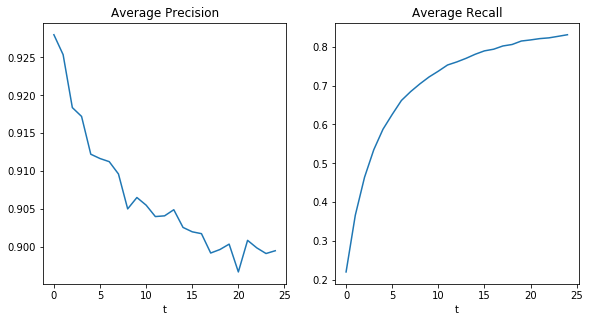

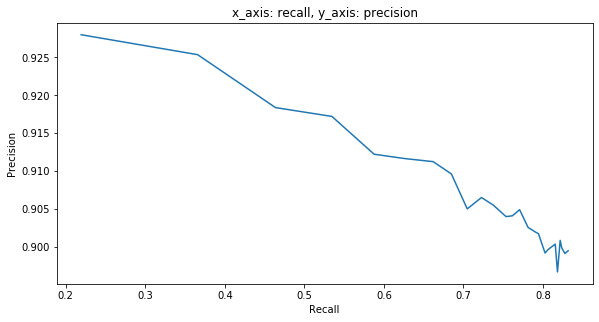

In [0]:
print('k-NN collaborative filter, k=20')
plt.figure(figsize=(6.4*1.5,4.8))
plt.subplot(1,2,1)
plt.title('Average Precision')
plt.xlabel('t')
plt.plot(precisions)

plt.subplot(1,2,2)
plt.title('Average Recall')
plt.xlabel('t')
plt.plot(recalls)
plt.show()

plt.figure(figsize=(6.4*1.5,4.8))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('x_axis: recall, y_axis: precision')
plt.plot(recalls,precisions)
plt.show()

# Question 37

In [0]:
#NNMF-based collaborative filter: Precision and Recall Calcs
data = getDF()
trainset, testset = train_test_split(data, test_size=.10)
kf = KFold(n_splits=10)
precisions = []
recalls = []
for i in range(25):
  print('t is: ',i+1)
  prec_temp = 0
  recall_temp = 0
  for trainset, testset in kf.split(data):
    algo = NMF(n_factors=18, biased=False)
    algo.fit(trainset)
    predictions=algo.test(testset)
    precision, recall = precision_recall_at_k(predictions, k=i+1, threshold=3)
    #precision, recall, users_prec, users_recall = eval_ranking_prec_recall(predictions,i+1)
    #prec_temp += precision
    #recall_temp += recall
    prec_temp += np.mean(list(precision.values()))
    recall_temp += np.mean(list(recall.values()))
  precisions.append(prec_temp/10)
  recalls.append(recall_temp/10)

nnmf_precisions = precisions
nnmf_recalls = recalls

t is:  1
t is:  2
t is:  3
t is:  4
t is:  5
t is:  6
t is:  7
t is:  8
t is:  9
t is:  10
t is:  11
t is:  12
t is:  13
t is:  14
t is:  15
t is:  16
t is:  17
t is:  18
t is:  19
t is:  20
t is:  21
t is:  22
t is:  23
t is:  24
t is:  25


NNMF-based collaborative filter, k=16


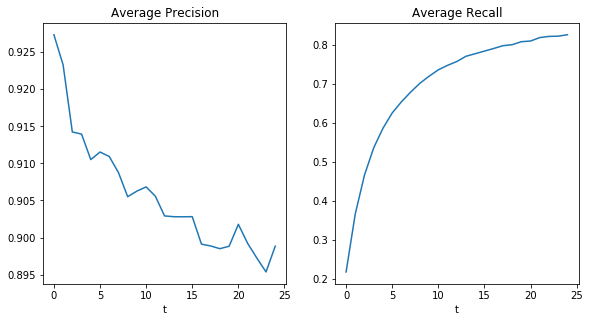

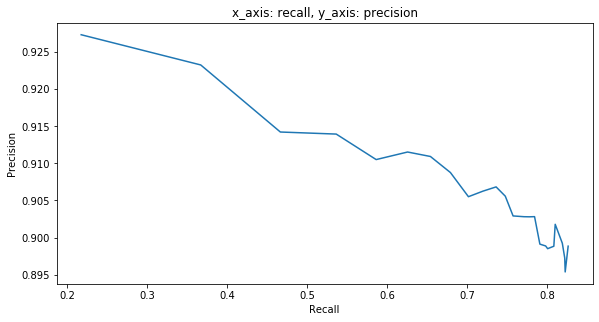

In [0]:
print('NNMF-based collaborative filter, k=16')
plt.figure(figsize=(6.4*1.5,4.8))
plt.subplot(1,2,1)
plt.title('Average Precision')
plt.xlabel('t')
plt.plot(precisions)

plt.subplot(1,2,2)
plt.title('Average Recall')
plt.xlabel('t')
plt.plot(recalls)
plt.show()

plt.figure(figsize=(6.4*1.5,4.8))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('x_axis: recall, y_axis: precision')
plt.plot(recalls,precisions)
plt.show()

# Question 38

In [0]:
#MF with bias-based collaborative filter: Precision and Recall Calcs
data = getDF()
trainset, testset = train_test_split(data, test_size=.10)
kf = KFold(n_splits=10)
precisions = []
recalls = []
for i in range(25):
  print('t is: ',i+1)
  prec_temp = 0
  recall_temp = 0
  for trainset, testset in kf.split(data):
    algo = SVD(n_factors=20, biased=True)
    algo.fit(trainset)
    predictions=algo.test(testset)
    precision, recall = precision_recall_at_k(predictions, k=i+1, threshold=3)
    #precision, recall, users_prec, users_recall = eval_ranking_prec_recall(predictions,i+1)
    #prec_temp += precision
    #recall_temp += recall
    prec_temp += np.mean(list(precision.values()))
    recall_temp += np.mean(list(recall.values()))
  precisions.append(prec_temp/10)
  recalls.append(recall_temp/10)

svd_precisions = precisions
svd_recalls = recalls

t is:  1
t is:  2
t is:  3
t is:  4
t is:  5
t is:  6
t is:  7
t is:  8
t is:  9
t is:  10
t is:  11
t is:  12
t is:  13
t is:  14
t is:  15
t is:  16
t is:  17
t is:  18
t is:  19
t is:  20
t is:  21
t is:  22
t is:  23
t is:  24
t is:  25


MF with bias-based collaborative filter, k=16


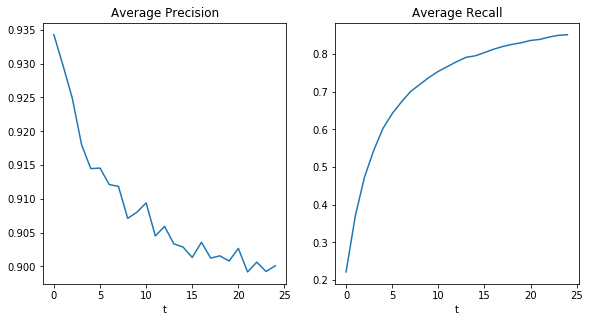

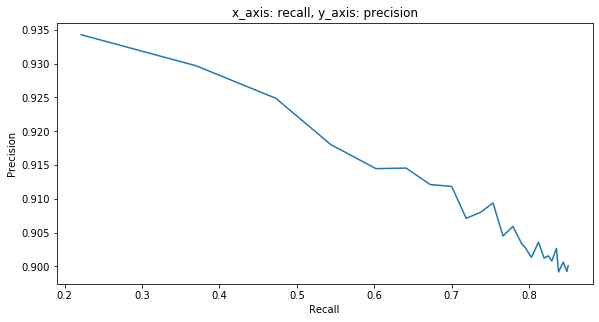

In [0]:
print('MF with bias-based collaborative filter, k=16')
plt.figure(figsize=(6.4*1.5,4.8))
plt.subplot(1,2,1)
plt.title('Average Precision')
plt.xlabel('t')
plt.plot(precisions)

plt.subplot(1,2,2)
plt.title('Average Recall')
plt.xlabel('t')
plt.plot(recalls)
plt.show()

plt.figure(figsize=(6.4*1.5,4.8))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('x_axis: recall, y_axis: precision')
plt.plot(recalls,precisions)
plt.show()

# Question 39

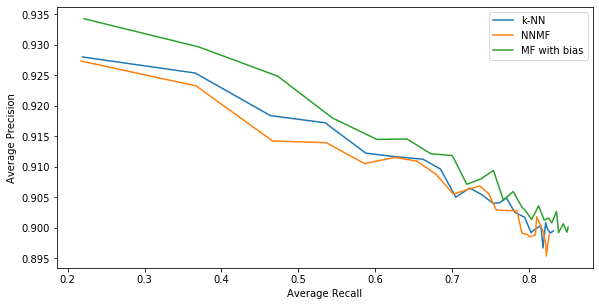

In [0]:
plt.figure(figsize=(6.4*1.5,4.8))
plt.xlabel('Average Recall')
plt.ylabel('Average Precision')
plt.plot(knn_recalls,knn_precisions, label = 'k-NN')
plt.plot(nnmf_recalls,nnmf_precisions, label = 'NNMF')
plt.plot(svd_recalls,svd_precisions, label = 'MF with bias')
plt.legend()
plt.show()